### Exercises (30 points)



Source: [Downey, Modeling and Simulation (2023), chapter 4.](https://nostarch.com/modeling-and-simulation-python)

1.  `*` means easy (5 points)
2.  `**` means medium (10 points)
3.  `***` means hard (20 points)



#### State initialization (`*`)



Write a function called `make_state` that creates a `State` object with
the state variables `leap=10` and `city=2`, and then returns the new `State`
object.

Then write a line of code that calls `make_state` and assigns the result
to a variable named `init`. Print `init` using `show`.

Don't forget to document your function.



In [1]:
from modsim import State, show

def make_state():
    """Initialize bikeshare system

    state: 10 bikes at leap, 2 at city location
    """
    state = State(leap=10,city=2)
    return state

init = make_state()
print(show(init))

state
leap     10
city      2

#### `linspace` documentation (`*`)



Find the documentation of `linspace` [at numpy.org](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

Make an array `arr` of 101 equally spaced points &isin; [0,1] and print it.

Verify that the length of `arr` is actually 101.



In [1]:
from numpy import linspace
arr = linspace(0,1,101)
print(arr)
print(len(arr))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
101

#### Parameter sweep at LEAP (`**`)



Create a function `sweep_p1` that takes an array `p1_array` as
parameter. It should create a new `SweepSeries` and run a simulation for
each value of `p1` in `p1_array`, with `p2=0.2` and `num_steps=60`.

The function should store the results in the `SweepSeries` variable and
return it.

The simulation result is a `State` object that represents the final
state of the system, including the performance metrics (unhappy
customers, or `state.leap_empty` for `p1`.).



In [1]:
<<import modsim>>
<<def bike_to_leap>>
<<def bike_to_city>>
<<def step>>
<<def run_simulation>>

from modsim import SweepSeries

def sweep_p1(p1_array):
    """Run series of simulations sweeping over p1

    p1_array: array of p1 values from linspace
    """
    p2 = 0.2
    num_steps = 60
    sweep = SweepSeries()

    for p1 in p1_array:
        state = run_simulation(p1,p2,num_steps)
        sweep[p1] = state.leap_empty

    return sweep

Now use `sweep_p1` to generate a `SweepSeries` and plot the number of
unhappy customers at LEAP as a function of `p1`. Label the axes.



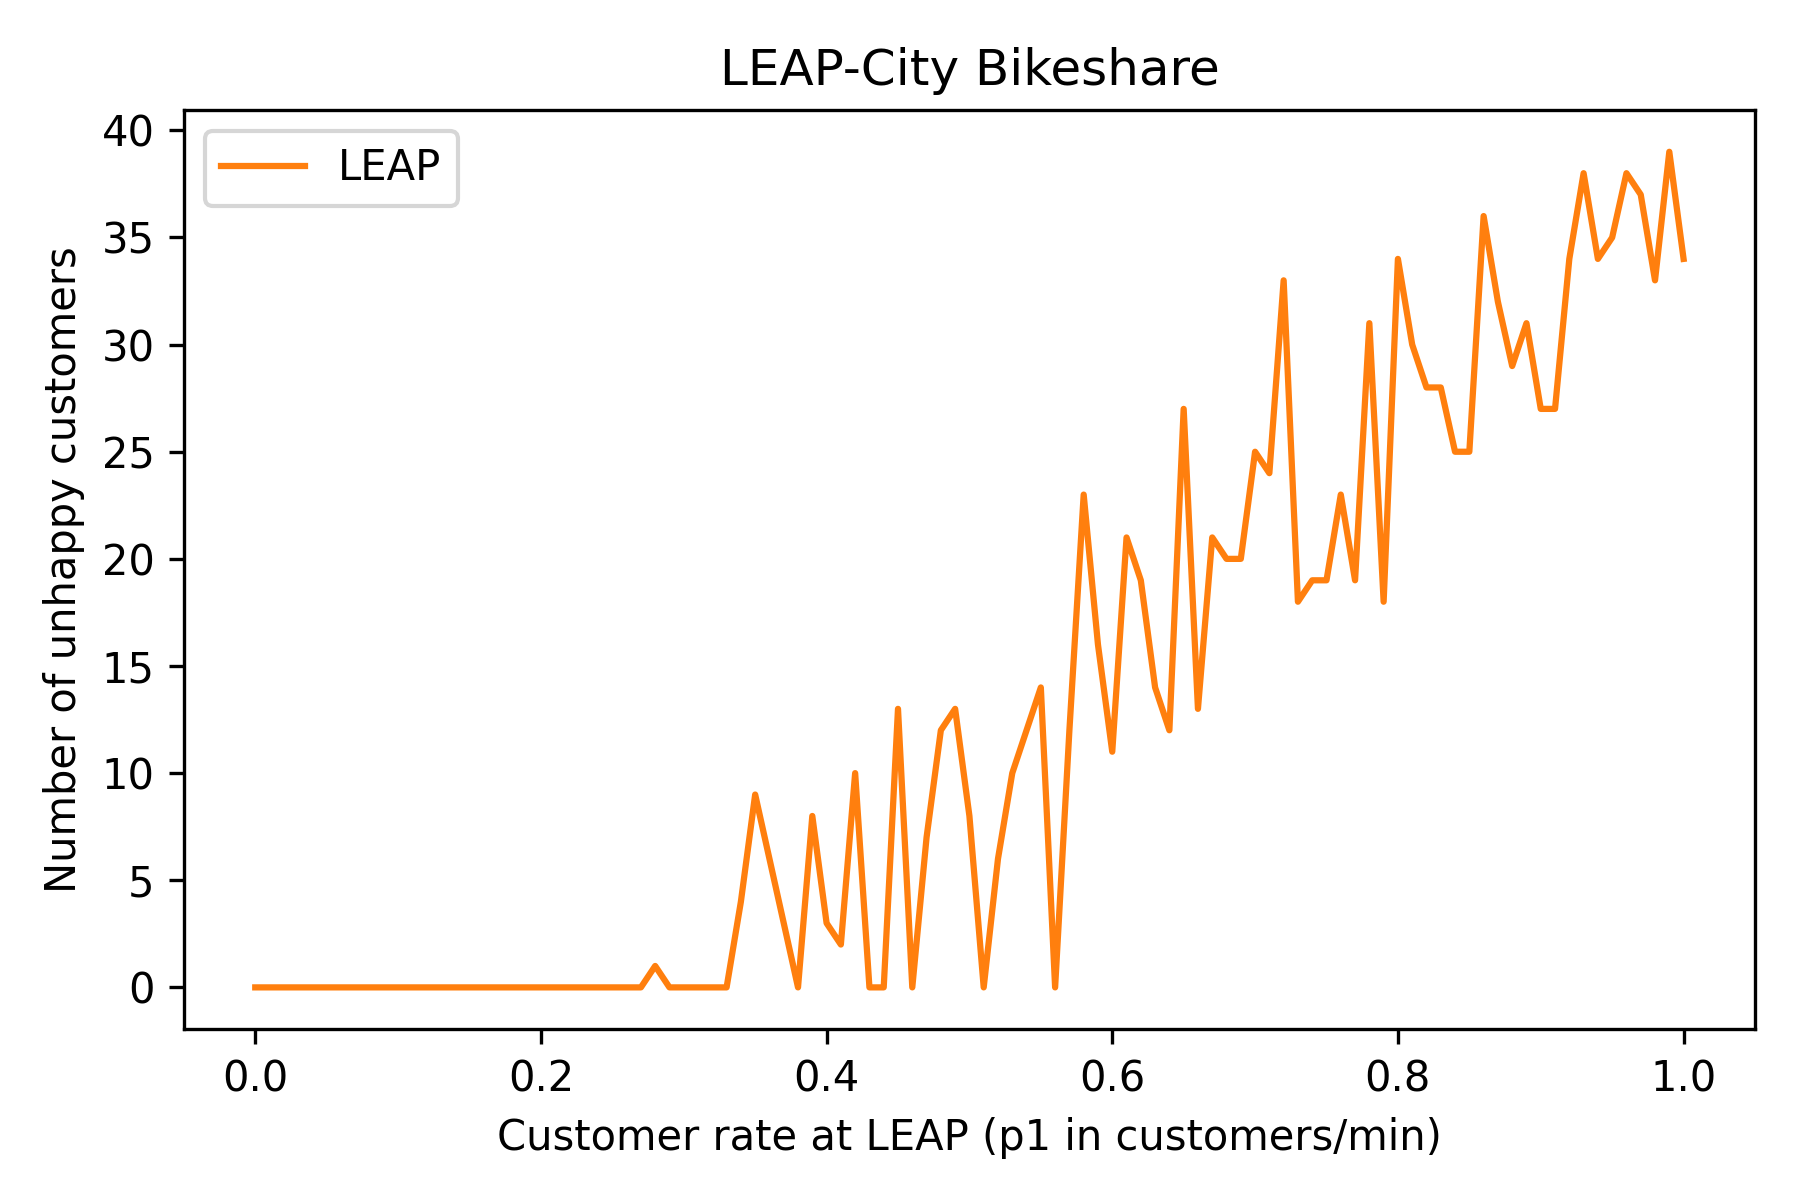

In [1]:
from modsim import State, flip, decorate
import matplotlib.pyplot as plt
from numpy import linspace

# make array of p1 values
p1_array = linspace(0,1,101)

# sweep through array - store unhappy LEAP customers in SweepSeries
sweep = sweep_p1(p1_array)

# plot number of unhappy customers at LEAP location vs. p1 values
sweep.plot(label='LEAP', color='C1')

# customize plot
decorate(title='LEAP-City Bikeshare',
         xlabel='Customer rate at LEAP (p1 in customers/min)',
         ylabel='Number of unhappy customers')

# store figure in PNG file, then clear current figure.
plt.savefig("img/leapSweep.png")  # import matplotlib.pyplot as plt
plt.clf()

#### Parameter sweep at city (`**`)



Write a function called `sweep_p2` that runs simulations with `p1=0.5`,
`num_steps=60` and a range of values for `p2`. It should store the result
in a `SweepSeries` and return the `SweepSeries`.



In [1]:
<<import modsim>>
<<def bike_to_leap>>
<<def bike_to_city>>
<<def step>>
<<def run_simulation>>

from modsim import SweepSeries

def sweep_p2(p2_array):
    """Run series of simulations sweeping over p2

    p2_array: array of p2 values from linspace
    """
    p1 = 0.5
    num_steps = 60
    sweep = SweepSeries()

    for p2 in p2_array:
        state = run_simulation(p1,p2,num_steps)
        sweep[p2] = state.city_empty

    return sweep

Plot the number of unhappy customers at the city location as a
function of `p2` using the color 'C2'.



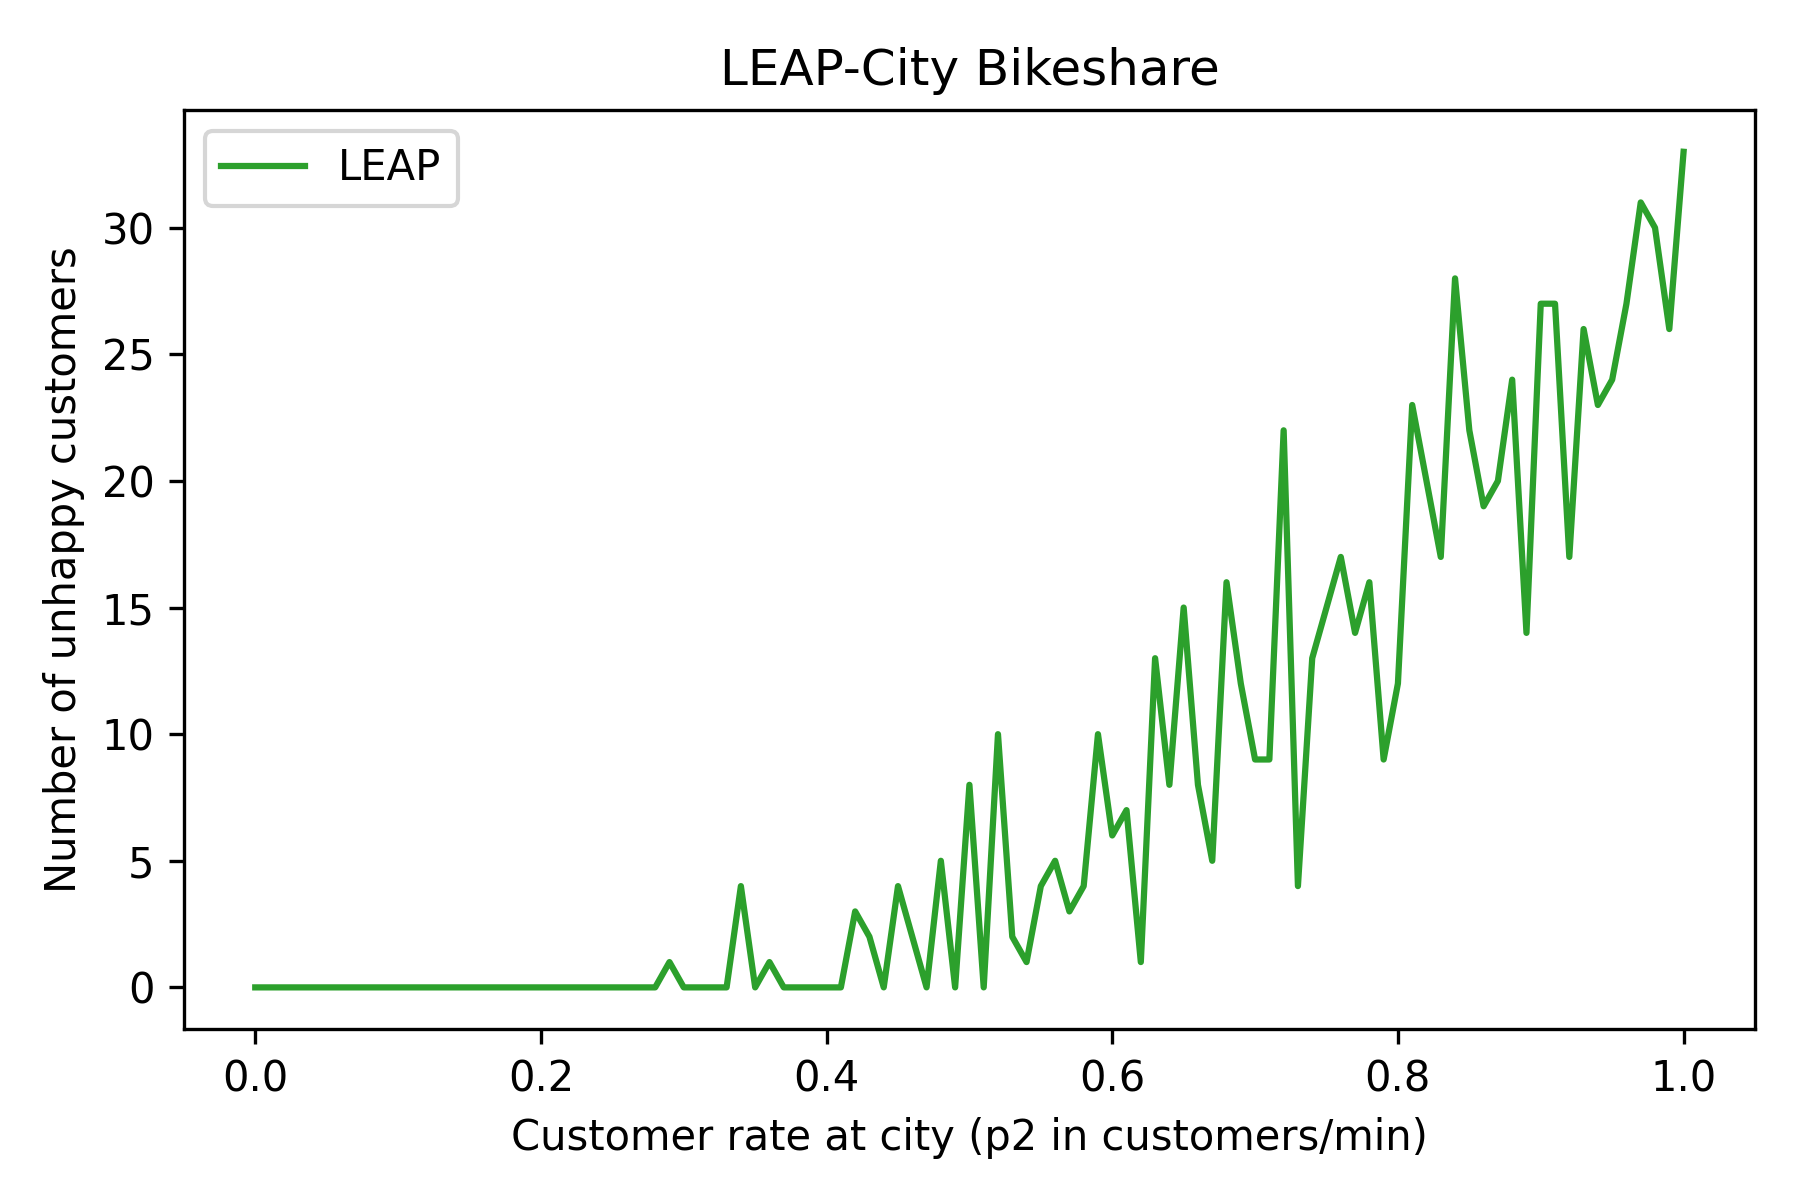

In [1]:
from modsim import State, flip, decorate
import matplotlib.pyplot as plt
from numpy import linspace

# make array of p1 values
p2_array = linspace(0,1,101)

# sweep through array - store unhappy city customers in SweepSeries
sweep = sweep_p2(p2_array)

# plot number of unhappy customers at city location vs. p2 values
sweep.plot(label='LEAP', color='C2')

# customize plot
decorate(title='LEAP-City Bikeshare',
         xlabel='Customer rate at city (p2 in customers/min)',
         ylabel='Number of unhappy customers')

# store figure in PNG file, then clear current figure.
plt.savefig("img/citySweep.png")  # import matplotlib.pyplot as plt
plt.clf()